In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
ds = pd.read_csv('SWFR_log_rings.txt')
ds

,Sex,HasSex,SexM,SexF,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Log[Rings],Pred Formula Log[Rings],Predicted Log[Rings],Residual Log[Rings],Studentized Resid Log[Rings],Lower 95% Mean Log[Rings],Upper 95% Mean Log[Rings]
0,M,1,1,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2.708050,2.230056,2.230056,0.477994,2.552461,2.216910,2.243202
1,M,1,1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1.945910,2.047240,2.047240,-0.101330,-0.541524,2.027616,2.066865
2,F,1,0,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2.197225,2.388037,2.388037,-0.190812,-1.018911,2.375035,2.401038
3,M,1,1,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2.302585,2.266028,2.266028,0.036557,0.195272,2.250030,2.282026
4,I,0,0,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1.945910,1.847076,1.847076,0.098835,0.527906,1.831537,1.862614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,1,0,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2.397895,2.356346,2.356346,0.041549,0.221808,2.346512,2.366180
4173,M,1,1,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2.302585,2.280664,2.280664,0.021921,0.117047,2.268676,2.292651
4174,M,1,1,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2.197225,2.344724,2.344724,-0.147499,-0.787452,2.334247,2.355201
4175,F,1,0,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2.302585,2.247705,2.247705,0.054880,0.293030,2.235458,2.259953


In [8]:
color_dict = sns.color_palette()
color_dict

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

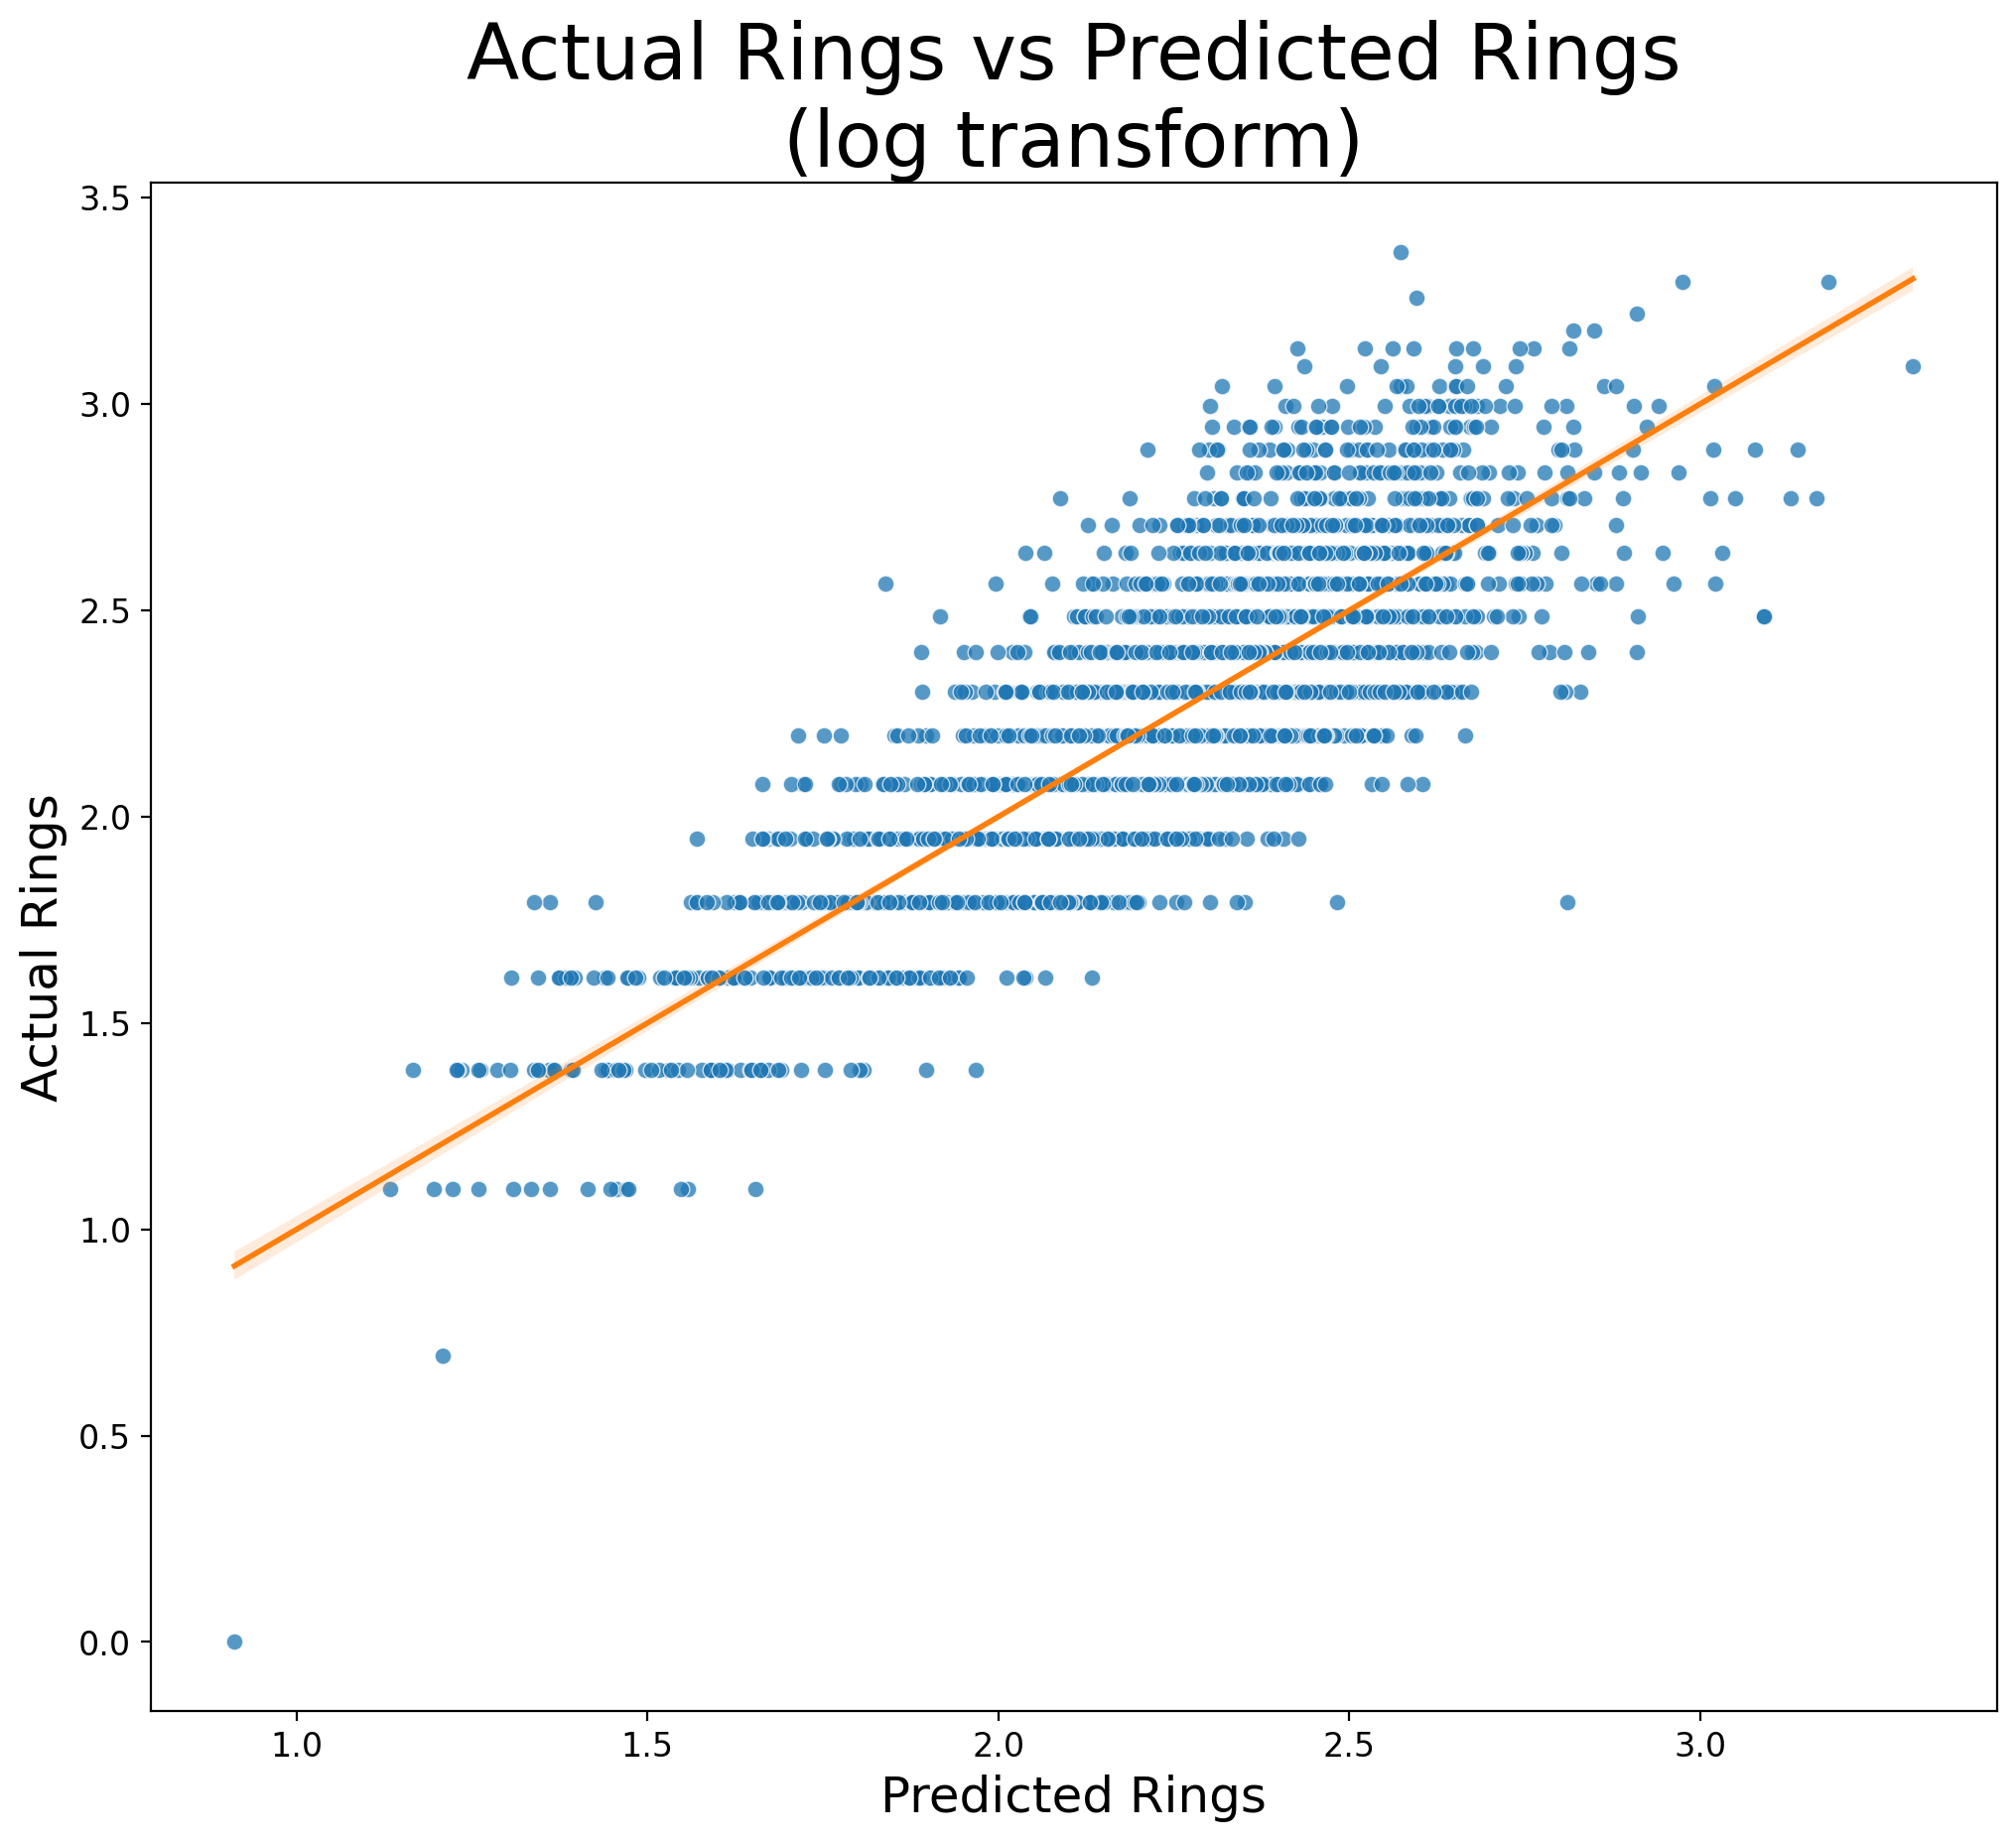

In [9]:
plt.figure(figsize=(12, 10), dpi=200)

sns.scatterplot(x='Predicted Log[Rings]', y='Log[Rings]', data=ds, alpha=0.75)
sns.regplot(x='Predicted Log[Rings]', y='Log[Rings]', data=ds, scatter=False, line_kws={'linewidth': 2}, color = color_dict[1])

plt.title('Actual Rings vs Predicted Rings\n(log transform)', fontdict={'fontsize': 28})
plt.xlabel('Predicted Rings', fontdict={'fontsize': 18})
plt.ylabel('Actual Rings', fontdict={'fontsize': 18})
plt.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('plots/actual_vs_predicted_logrings_swfr.png')

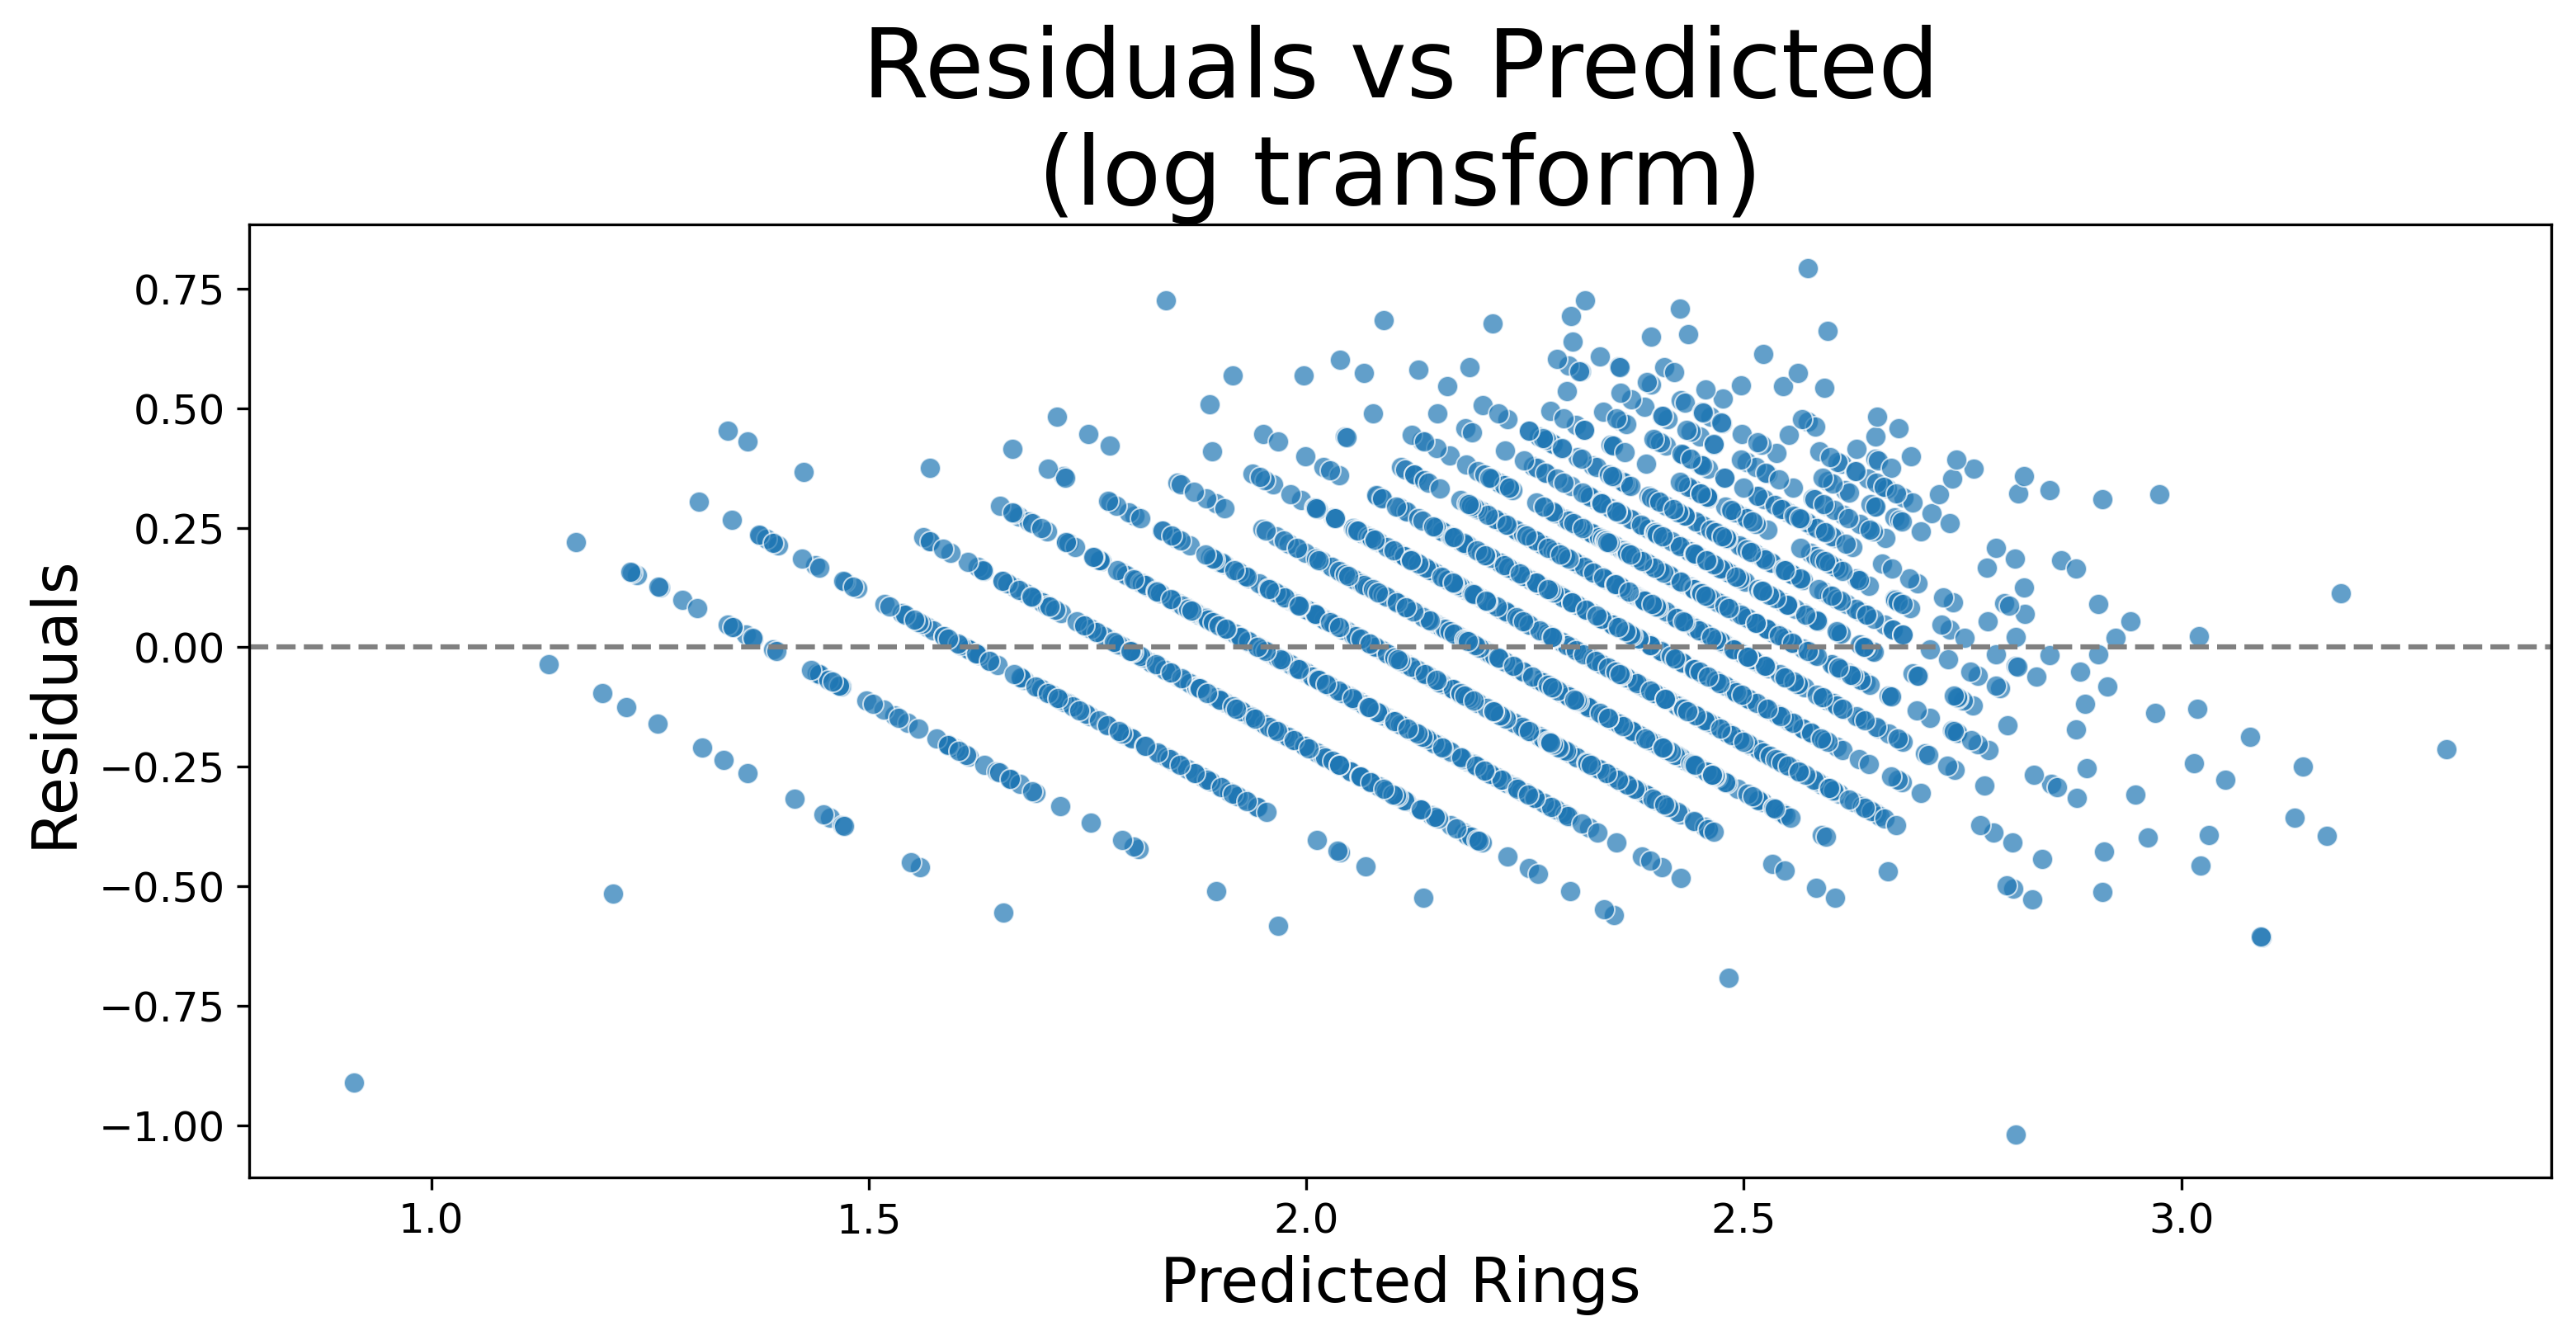

In [10]:
plt.figure(figsize=(12, 5), dpi=300)

sns.scatterplot(x='Predicted Log[Rings]', y='Residual Log[Rings]', data=ds, alpha = 0.7, color = color_dict[0])
plt.axhline(0, color='grey', linestyle='--')

plt.title('Residuals vs Predicted\n(log transform)', fontdict={'fontsize': 28})
plt.xlabel('Predicted Rings', fontdict={'fontsize': 18})
plt.ylabel('Residuals', fontdict={'fontsize': 18})
plt.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('plots/residuals_vs_predicted_logrings_swfr.png')

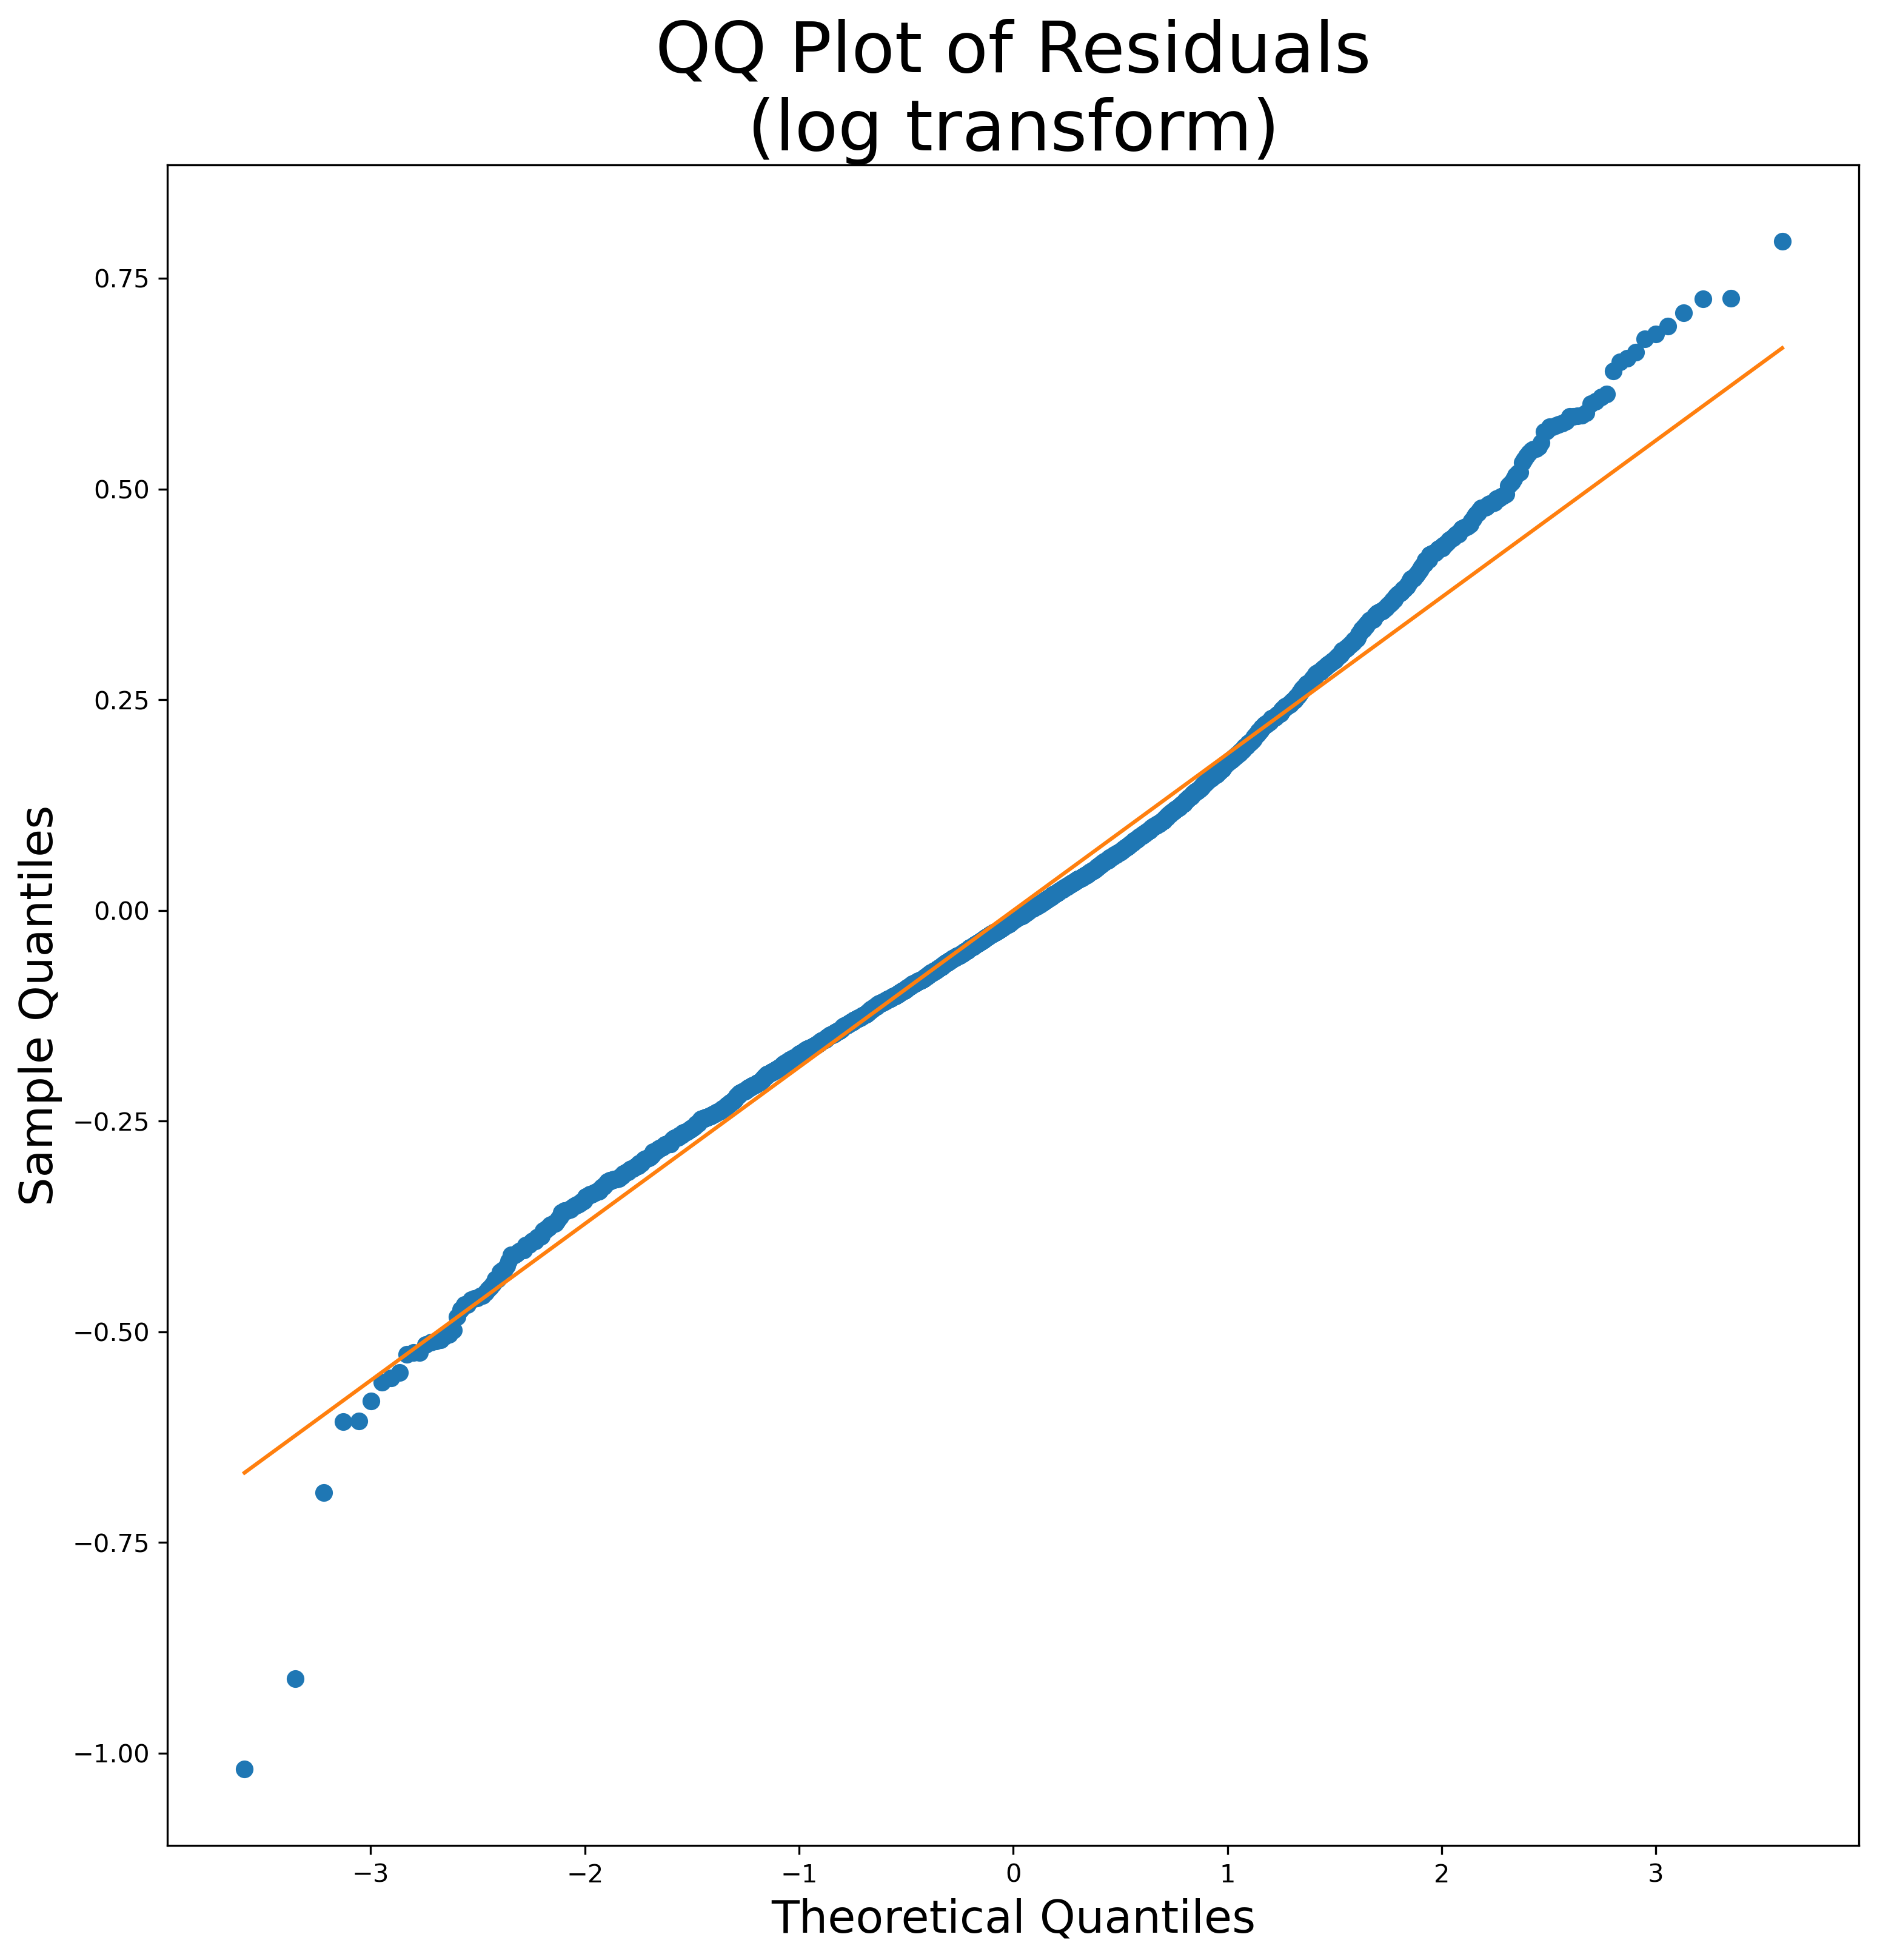

In [11]:
fig = plt.figure(figsize=(12, 12), dpi=300)
ax = fig.add_subplot(111)

res = stats.probplot(ds['Residual Log[Rings]'], dist="norm", plot=ax)

ax.get_lines()[0].set_markerfacecolor(color_dict[0])
ax.get_lines()[0].set_markeredgecolor(color_dict[0])
ax.get_lines()[1].set_color(color_dict[1])

plt.title('QQ Plot of Residuals\n(log transform)', fontdict={'fontsize': 28})
plt.xlabel('Theoretical Quantiles', fontdict={'fontsize': 18})
plt.ylabel('Sample Quantiles', fontdict={'fontsize': 18})

plt.savefig('plots/qq_plot_residuals_log_swfr.png')

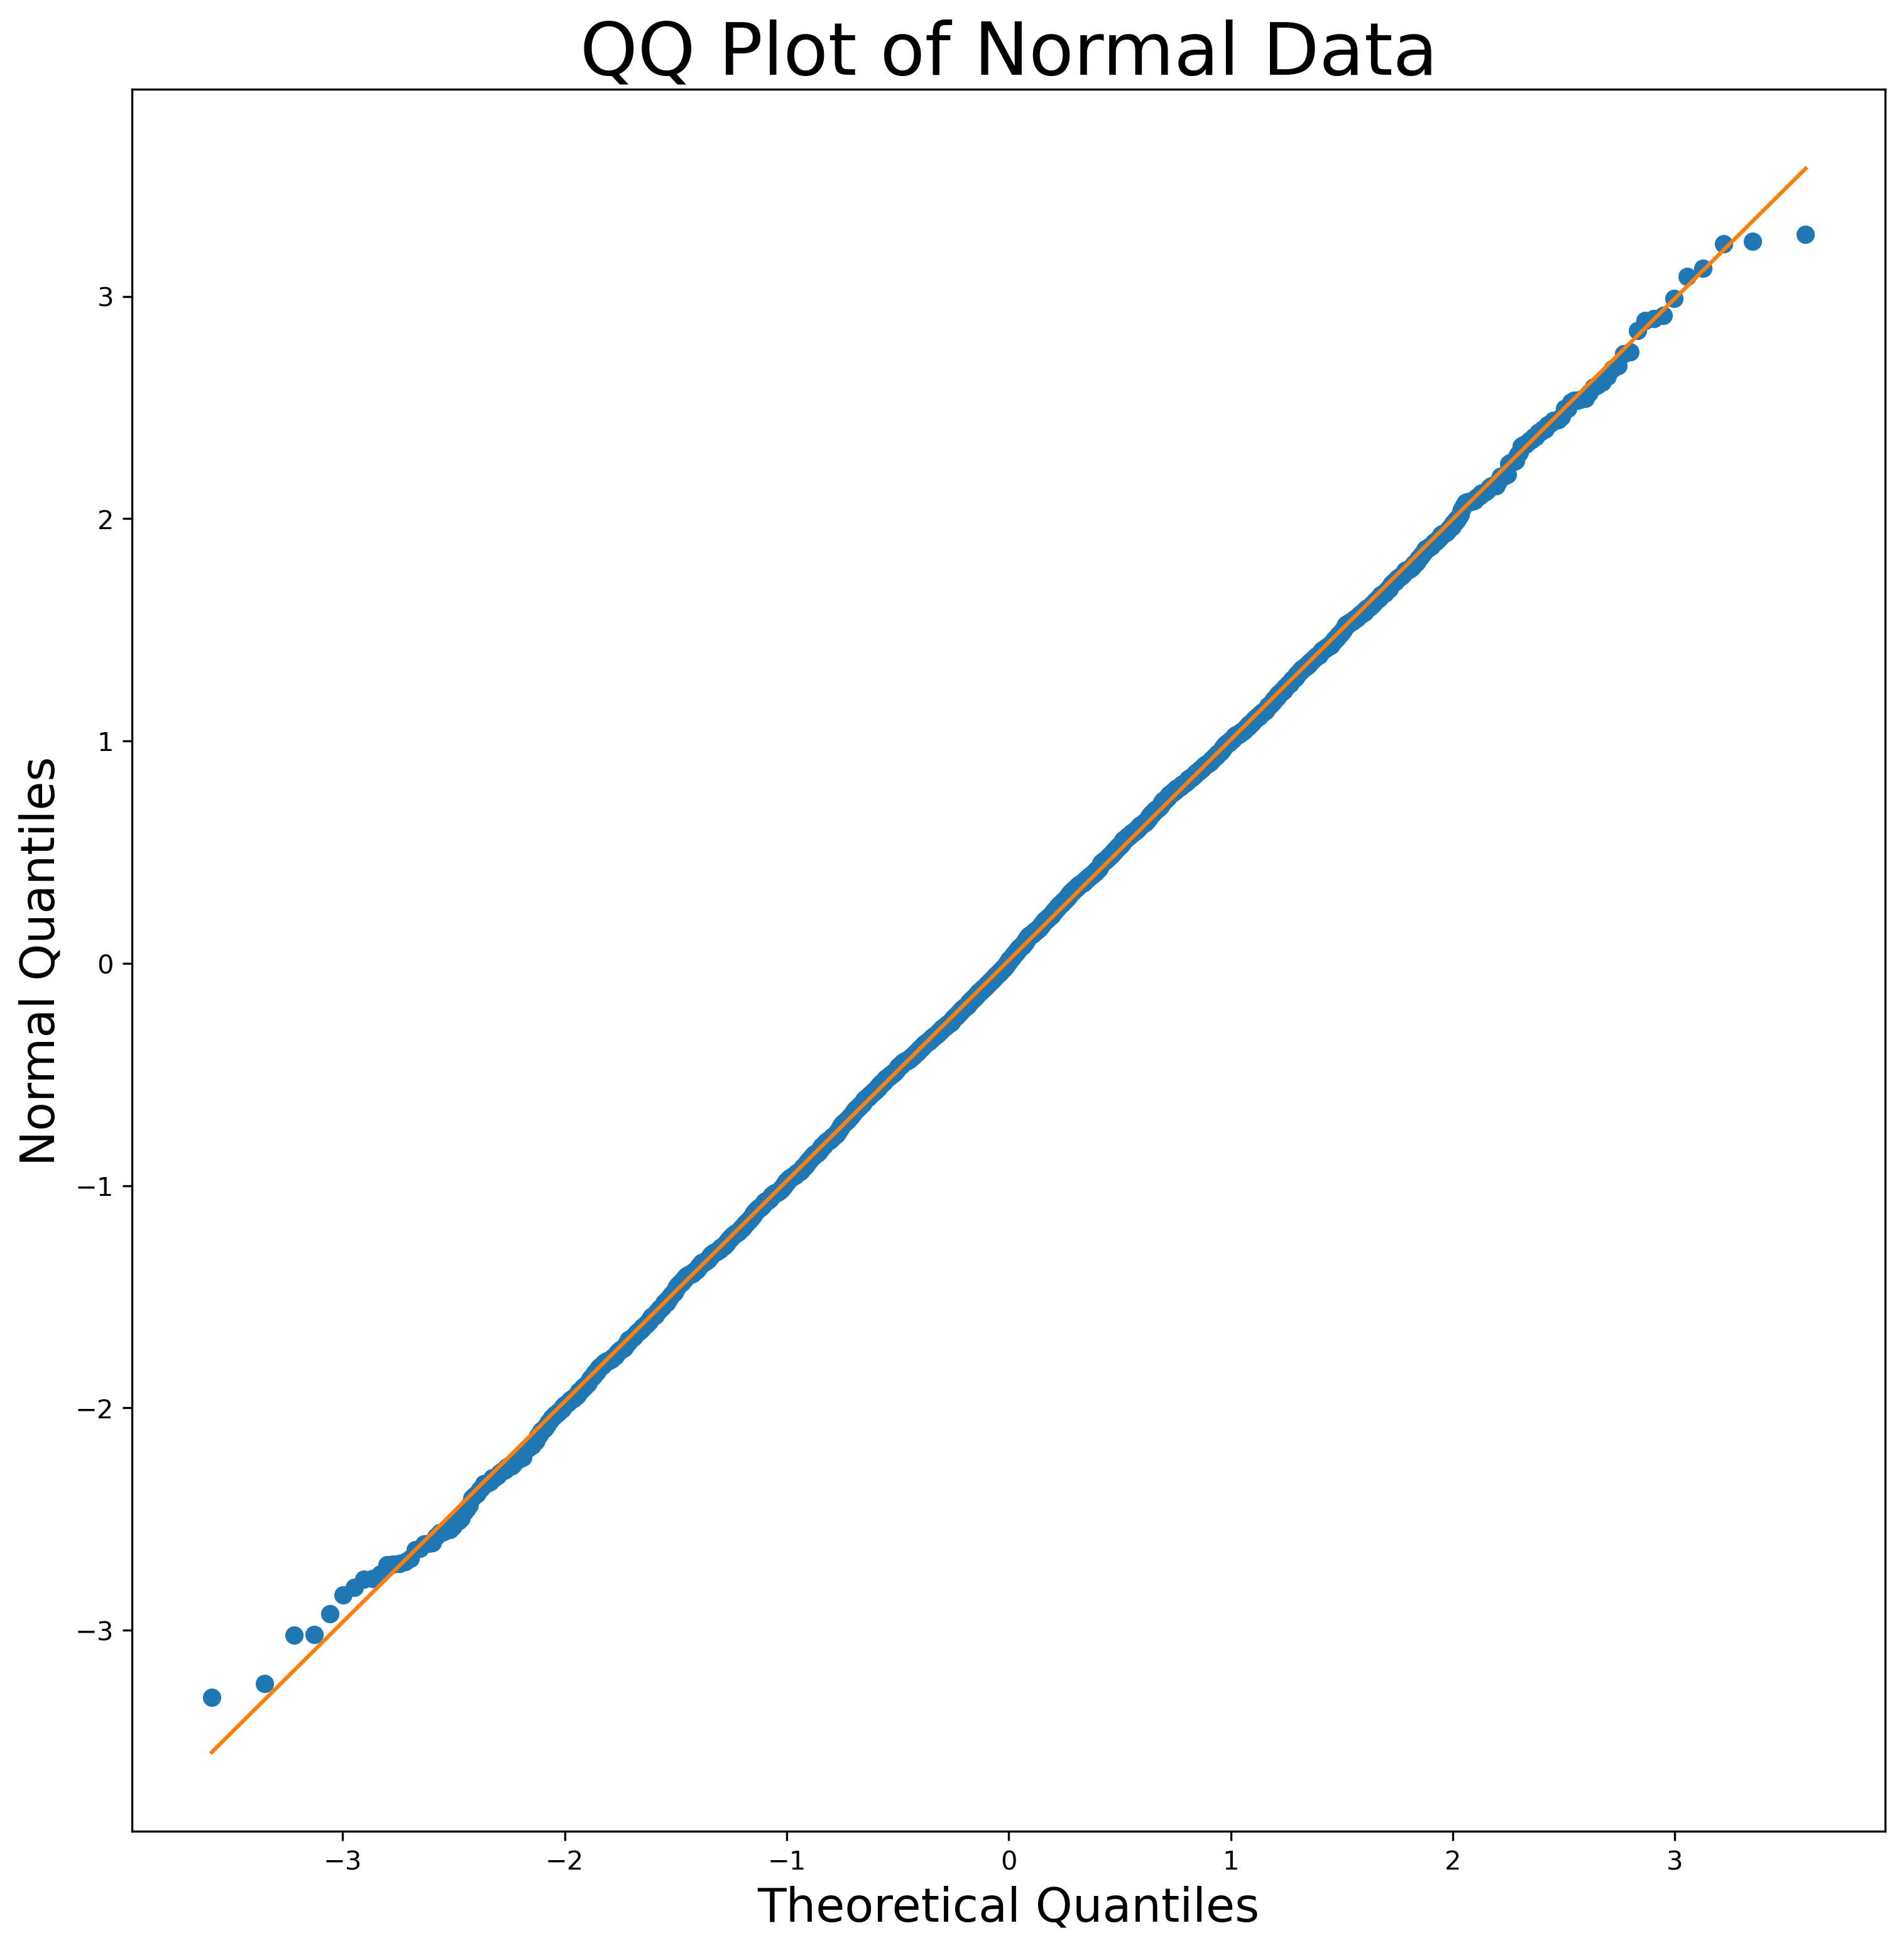

In [31]:
fig = plt.figure(figsize=(12, 12), dpi=300)
ax = fig.add_subplot(111)

dummy_data = np.random.normal(loc=0, scale=1, size=4177)
res = stats.probplot(dummy_data, dist="norm", plot=plt)

ax.get_lines()[0].set_markerfacecolor(color_dict[0])
ax.get_lines()[0].set_markeredgecolor(color_dict[0])
ax.get_lines()[1].set_color(color_dict[1])

plt.title('QQ Plot of Normal Data', fontdict={'fontsize': 28})
plt.xlabel('Theoretical Quantiles', fontdict={'fontsize': 18})
plt.ylabel('Normal Quantiles', fontdict={'fontsize': 18})

plt.savefig('plots/qq_plot_normal_data.png')

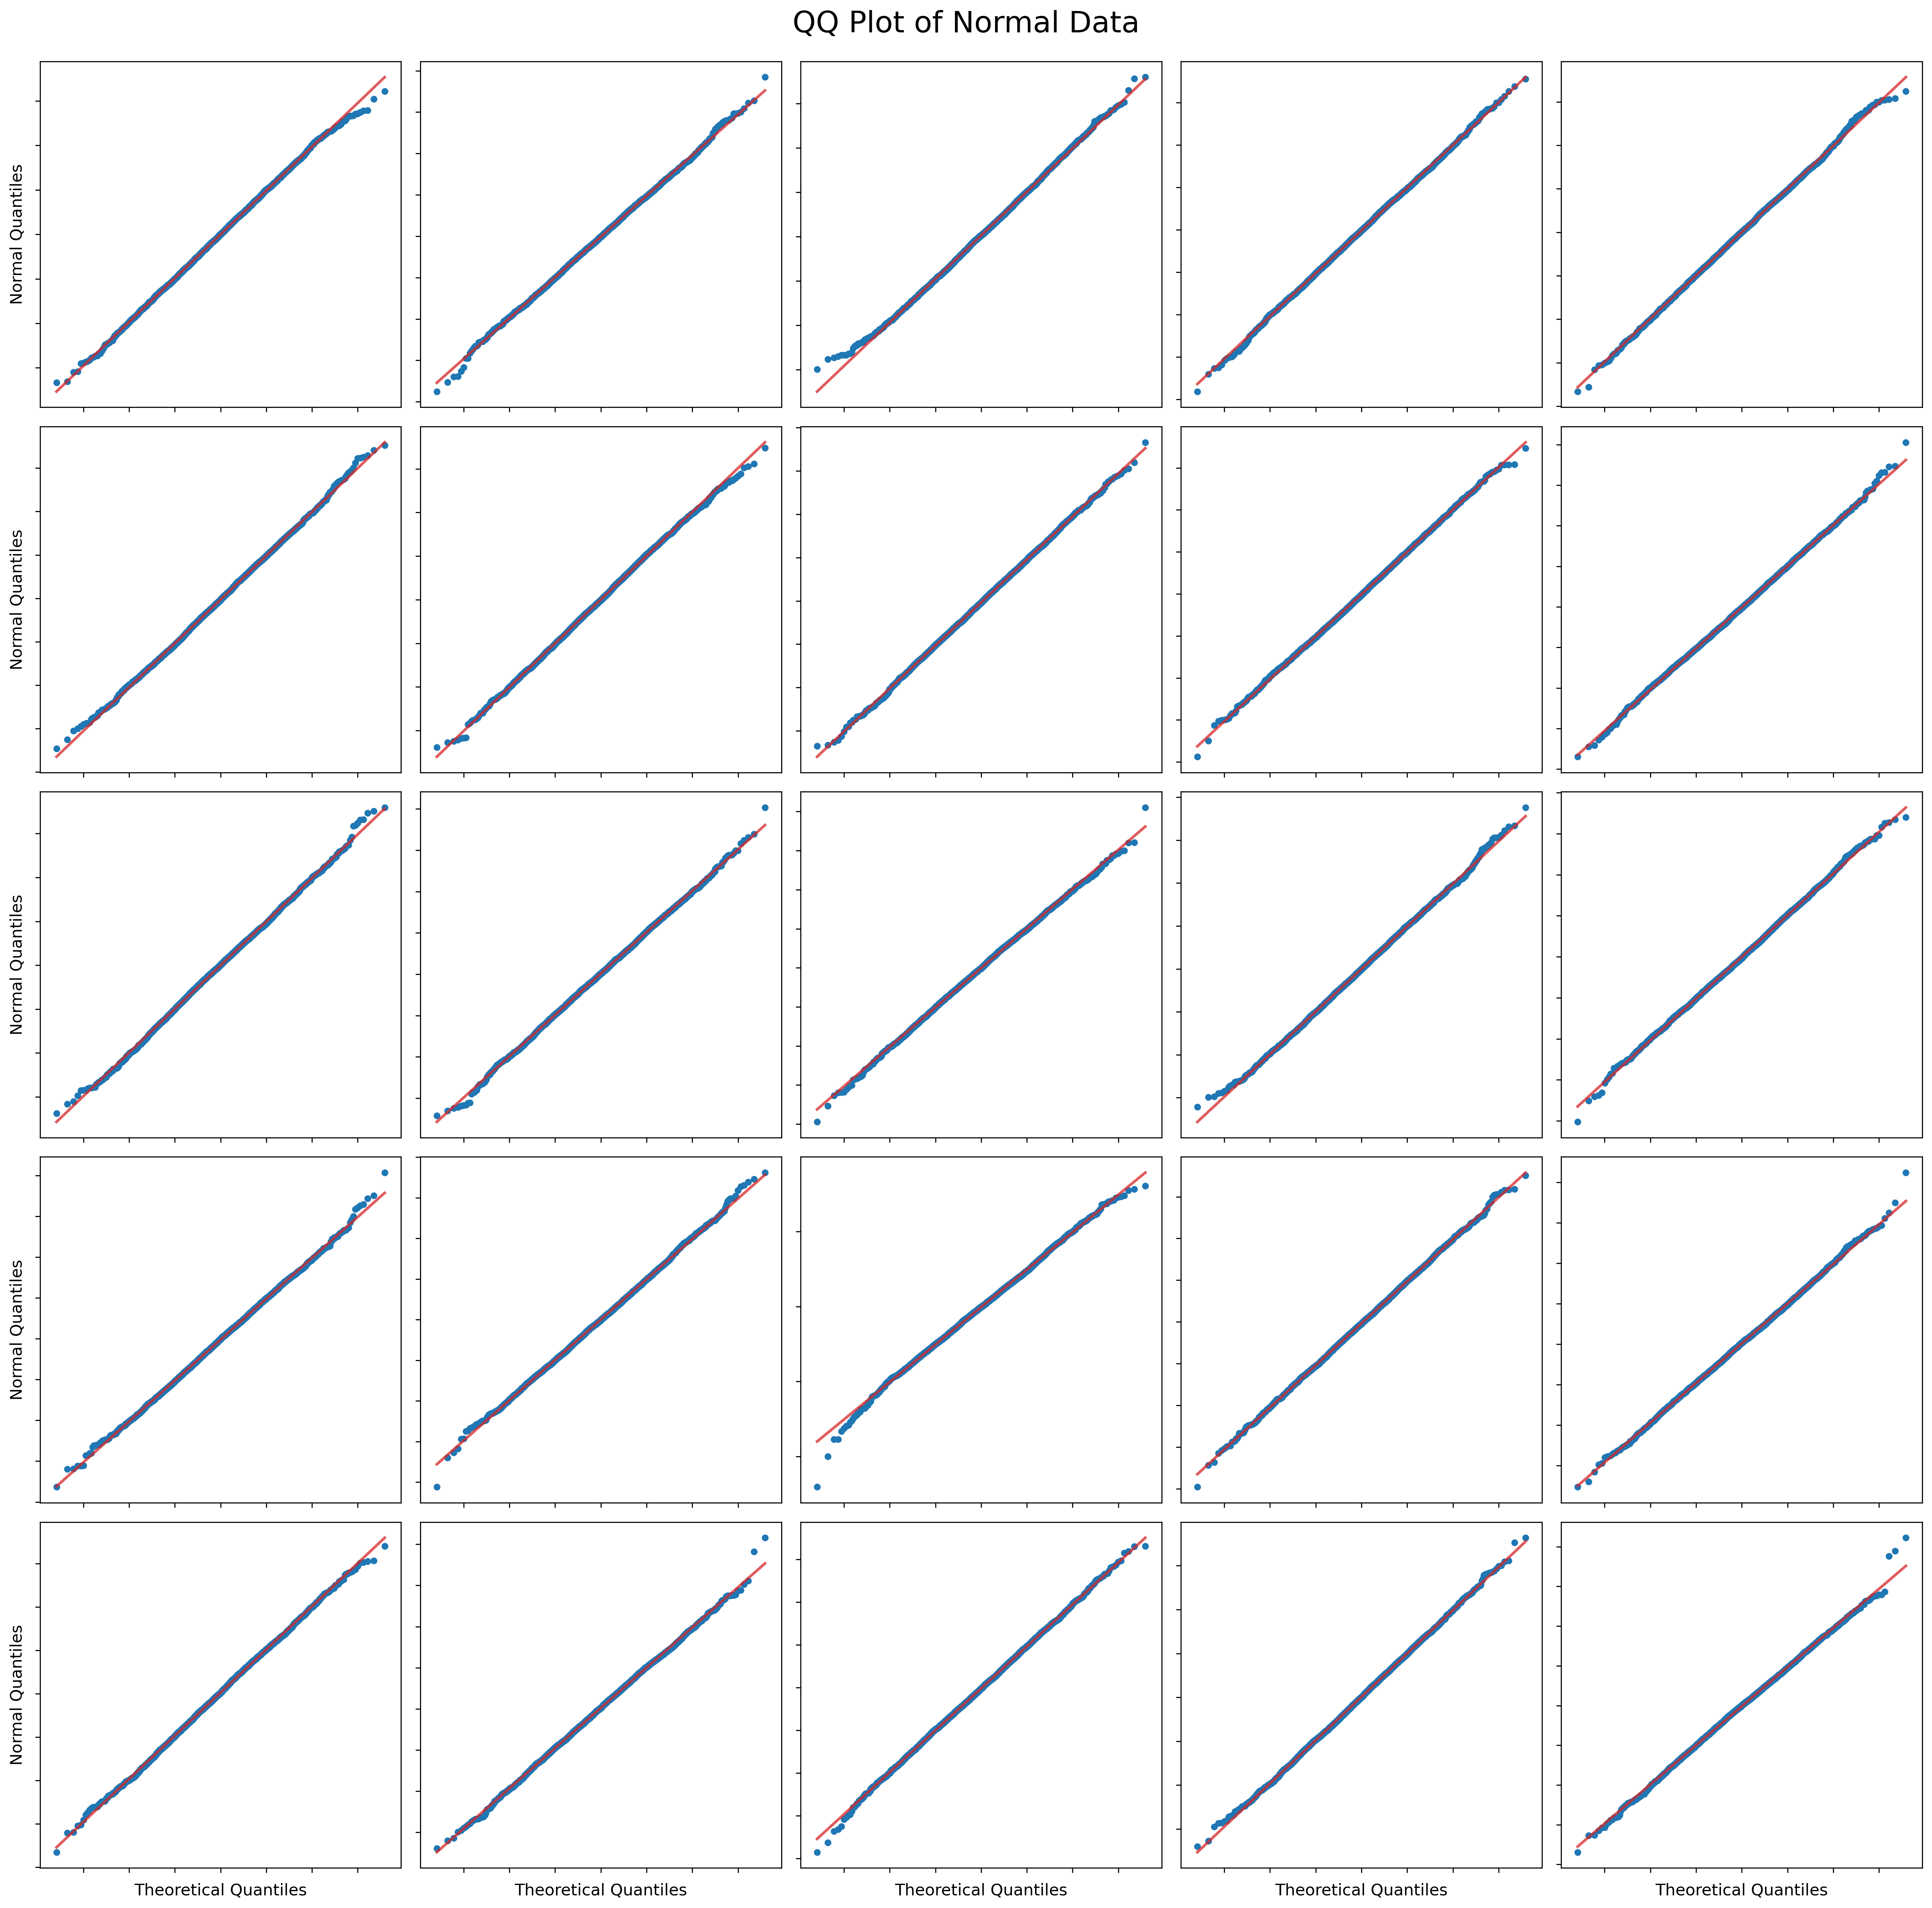

In [32]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20), dpi=300)

plt.suptitle('QQ Plot of Normal Data\n', fontsize=22)

for i in range(5):
    for j in range(5):
        dummy_data = np.random.normal(loc=0, scale=1, size=4177)
        res = stats.probplot(dummy_data, dist="norm", plot=axs[i, j])

        axs[i, j].get_lines()[0].set_markerfacecolor(color_dict[0])
        axs[i, j].get_lines()[0].set_markeredgecolor(color_dict[0])
        axs[i, j].get_lines()[0].set_markersize(4)
        axs[i, j].get_lines()[1].set_color(color_dict[3])
        axs[i, j].get_lines()[1].set_linewidth(2)
        axs[i, j].get_lines()[1].set_alpha(0.75)

        axs[i, j].set_title('')
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
        axs[i, j].set_xticklabels([])
        axs[i, j].set_yticklabels([])
        
        if i == 4 :
            axs[i, j].set_xlabel('Theoretical Quantiles', fontdict={'fontsize': 12})
        if j == 0:
            axs[i, j].set_ylabel('Normal Quantiles', fontdict={'fontsize': 12})

plt.tight_layout()
plt.savefig('plots/qq_plot_normal_data.png') 
# plt.show()